## Your tasks

0. Due to a reorganisation of the course, we probably will not have the time to give you an introduction to the important `scipy`-module in lecture this year. Therefore, we include it as part of the projects for those who are mainly interested in science/physics applications with the Python language. If you are interested in this project, please first watch Thomas Erben's [Introduction to scipy video](https://youtu.be/wfjqpa2Dsnk) from 2022. Especially important is the part on [numerically solving ordinary differential equations](https://youtu.be/wfjqpa2Dsnk?t=3918) (ODEs). The lecture material for the video can be found [here](https://github.com/terben/Programming_in_Python_BCGS_Summer_2022/tree/master/lecture_09).
**Important:** The rest of the notebook probably will not make too much sense before you watched the video!
1. Prepare the ODE-system governing the movements of the moons for `odeint`. Note that you will obtain eight(!) ODEs of first order in total! Please describe in your solution the used notation. Your grader needs to be able to follow and understand your implementation easily.
2. Solve the system for $0\leq t \leq 2000$ and plot for both moons the distance to Saturn as a function of time. This should make clear how the moons avoid a collision on their orbits.
3. Create an animation of the moons movements with `matplotlib`. You can consider here the range $-200\leq x, y\leq 200$.

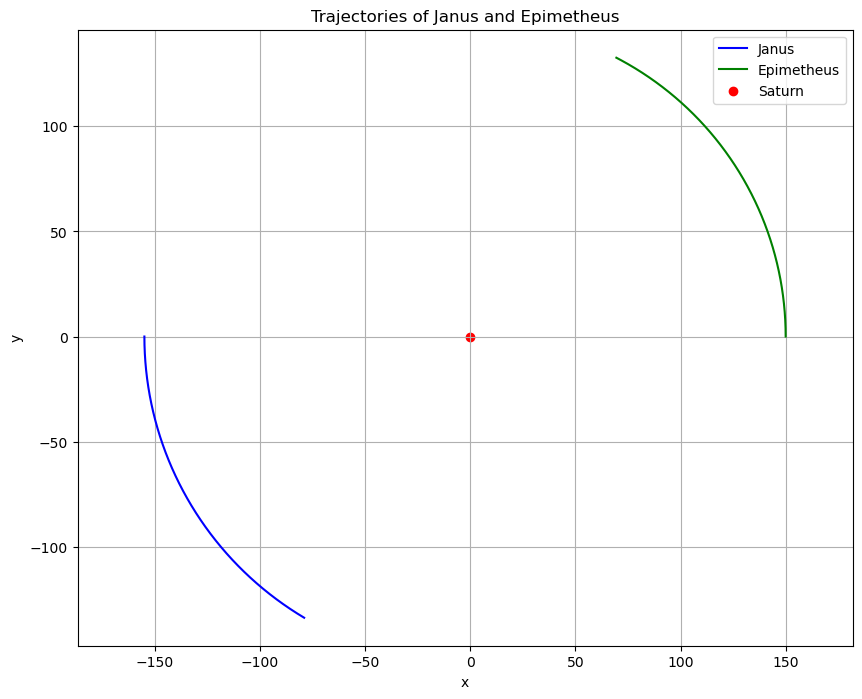

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

# constants
G = 1
m_J = 1
m_E = 4
m_S = 4e4

# initial positions and velocities
x_J0, y_J0 = -155, 0
vx_J0, vy_J0 = 0, -16.1

x_E0, y_E0 = 150, 0
vx_E0, vy_E0 = 0, 16.3

# initial state vector
state0 = [x_J0, y_J0, vx_J0, vy_J0, x_E0, y_E0, vx_E0, vy_E0]

# time points for integration
t = np.linspace(0, 10, 1000)

# function to compute the derivatives
def derivatives(state, t):
    x_J, y_J, vx_J, vy_J, x_E, y_E, vx_E, vy_E = state
    
    # distances
    r_JS = np.sqrt(x_J**2 + y_J**2)
    r_ES = np.sqrt(x_E**2 + y_E**2)
    r_JE = np.sqrt((x_J - x_E)**2 + (y_J - y_E)**2)
    
    # accelerations
    ax_J = -G * (m_S * x_J / r_JS**3 + m_E * (x_J - x_E) / r_JE**3)
    ay_J = -G * (m_S * y_J / r_JS**3 + m_E * (y_J - y_E) / r_JE**3)
    
    ax_E = -G * (m_S * x_E / r_ES**3 + m_J * (x_E - x_J) / r_JE**3)
    ay_E = -G * (m_S * y_E / r_ES**3 + m_J * (y_E - y_J) / r_JE**3)
    
    return [vx_J, vy_J, ax_J, ay_J, vx_E, vy_E, ax_E, ay_E]

# integrate the ODEs
sol = odeint(derivatives, state0, t)

# extract results
x_J, y_J = sol[:, 0], sol[:, 1]
x_E, y_E = sol[:, 4], sol[:, 5]

# plotting the trajectories
plt.figure(figsize=(10, 8))
plt.plot(x_J, y_J, label='Janus', color='blue')
plt.plot(x_E, y_E, label='Epimetheus', color='green')
plt.scatter(0, 0, color='red', label='Saturn')
plt.title('Trajectories of Janus and Epimetheus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


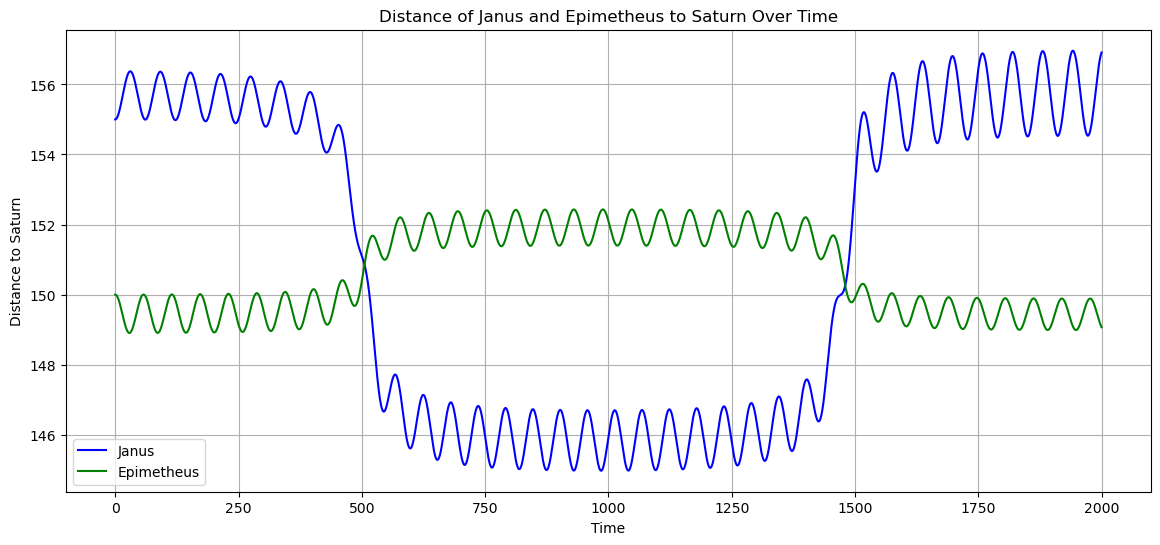

In [2]:
x_E0, y_E0 = 150, 0
vx_E0, vy_E0 = 0, 16.3

# initial state vector
state0 = [x_J0, y_J0, vx_J0, vy_J0, x_E0, y_E0, vx_E0, vy_E0]

# time points for integration
t = np.linspace(0, 2000, 10000)

# function to compute the derivatives
def derivatives(state, t):
    x_J, y_J, vx_J, vy_J, x_E, y_E, vx_E, vy_E = state
    
    # distances
    r_JS = np.sqrt(x_J**2 + y_J**2)
    r_ES = np.sqrt(x_E**2 + y_E**2)
    r_JE = np.sqrt((x_J - x_E)**2 + (y_J - y_E)**2)
    
    # accelerations
    ax_J = -G * (m_S * x_J / r_JS**3 + m_E * (x_J - x_E) / r_JE**3)
    ay_J = -G * (m_S * y_J / r_JS**3 + m_E * (y_J - y_E) / r_JE**3)
    
    ax_E = -G * (m_S * x_E / r_ES**3 + m_J * (x_E - x_J) / r_JE**3)
    ay_E = -G * (m_S * y_E / r_ES**3 + m_J * (y_E - y_J) / r_JE**3)
    
    return [vx_J, vy_J, ax_J, ay_J, vx_E, vy_E, ax_E, ay_E]

# integrate the ODEs
sol = odeint(derivatives, state0, t)

# extract results
x_J, y_J = sol[:, 0], sol[:, 1]
x_E, y_E = sol[:, 4], sol[:, 5]

# calculate distances to Saturn
r_JS = np.sqrt(x_J**2 + y_J**2)
r_ES = np.sqrt(x_E**2 + y_E**2)

# plotting the distances
plt.figure(figsize=(14, 6))
plt.plot(t, r_JS, label='Janus', color='blue')
plt.plot(t, r_ES, label='Epimetheus', color='green')
plt.title('Distance of Janus and Epimetheus to Saturn Over Time')
plt.xlabel('Time')
plt.ylabel('Distance to Saturn')
plt.legend()
plt.grid(True)
plt.show()


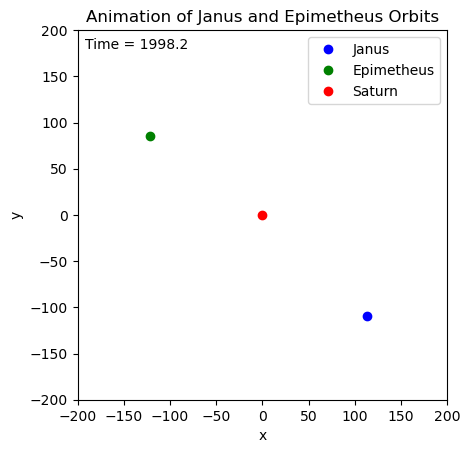

In [3]:
# constants
G = 1
m_J = 1
m_E = 4
m_S = 4e4

# initial positions and velocities
x_J0, y_J0 = -155, 0
vx_J0, vy_J0 = 0, -16.1

x_E0, y_E0 = 150, 0
vx_E0, vy_E0 = 0, 16.3

# initial state vector
state0 = [x_J0, y_J0, vx_J0, vy_J0, x_E0, y_E0, vx_E0, vy_E0]

# time points for integration
t = np.linspace(0, 2000, 10000)

# function to compute the derivatives
def derivatives(state, t):
    x_J, y_J, vx_J, vy_J, x_E, y_E, vx_E, vy_E = state
    
    # distances
    r_JS = np.sqrt(x_J**2 + y_J**2)
    r_ES = np.sqrt(x_E**2 + y_E**2)
    r_JE = np.sqrt((x_J - x_E)**2 + (y_J - y_E)**2)
    
    # accelerations
    ax_J = -G * (m_S * x_J / r_JS**3 + m_E * (x_J - x_E) / r_JE**3)
    ay_J = -G * (m_S * y_J / r_JS**3 + m_E * (y_J - y_E) / r_JE**3)
    
    ax_E = -G * (m_S * x_E / r_ES**3 + m_J * (x_E - x_J) / r_JE**3)
    ay_E = -G * (m_S * y_E / r_ES**3 + m_J * (y_E - y_J) / r_JE**3)
    
    return [vx_J, vy_J, ax_J, ay_J, vx_E, vy_E, ax_E, ay_E]

# integrate the ODEs
sol = odeint(derivatives, state0, t)

# extract results
x_J, y_J = sol[:, 0], sol[:, 1]
x_E, y_E = sol[:, 4], sol[:, 5]

# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots()
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Animation of Janus and Epimetheus Orbits')

line_J, = ax.plot([], [], 'bo', label='Janus')
line_E, = ax.plot([], [], 'go', label='Epimetheus')
saturn, = ax.plot(0, 0, 'ro', label='Saturn')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# initialize the background of each frame
def init():
    line_J.set_data([], [])
    line_E.set_data([], [])
    time_text.set_text('')
    return line_J, line_E, time_text

# update the animation for each frame
def update(frame):
    frame_index = frame * 10  # Skip every 10 frames
    if frame_index >= len(t):
        return line_J, line_E, time_text
    line_J.set_data([x_J[frame_index]], [y_J[frame_index]])
    line_E.set_data([x_E[frame_index]], [y_E[frame_index]])
    time_text.set_text(f'Time = {t[frame_index]:.1f}')
    return line_J, line_E, time_text

# create the animation
ani = FuncAnimation(fig, update, frames=len(t)//10, init_func=init, blit=True, interval=20, repeat=False)

# save the animation as a GIF
gif_writer = PillowWriter(fps=30)
ani.save('janus_epimetheus_orbits.gif', writer=gif_writer)

#save the animation as an MP4
##mp4_writer = FFMpegWriter(fps=30)
##ani.save('janus_epimetheus_orbits.mp4', writer=mp4_writer)

plt.legend()
plt.show()
